In [4]:
import proteomics as ps
from proteomics.cleavage_patterns import enzyme_cleavage_patterns
from proteomics.amino_acid_mass_dalton import amino_acid_mass_dalton

# FASTA Input

In [5]:
proteins = ps.read_fasta("data/sample_proteins.fasta")
len(proteins)

3

In [6]:
proteins

{'P11802': 'MATSRYEPVAEIGVGAYGTVYKARDPHSGHFVALKSVRVPNGGGGGGGLPISTVREVALLRRLEAFEHPNVVRLMDVCATSRTDREIKVTLVFEHVDQDLRTYLDKAPPPGLPAETIKDLMRQFLRGLDFLHANCIVHRDLKPENILVTSGGTVKLADFGLARIYSYQMALTPVVVTLWYRAPEVLLQSTYATPVDMWSVGCIFAEMFRRKPLFCGNSEADQLGKIFDLIGLPPEDDWPRDVSLPRGAFPPRGPRPVQSVVPEMEESGAQLLLEMLTFNPHKRISAFRALQHSYLHKDEGNPE',
 'A0A087WTH1': 'MEDEEKAVEILGNTEAAHPPSPIRCCWLRLRCLAATSIICGCSCLGVMALVFAIKAEERHKAGRSEEAVRWGARARKLILASFAVWLAVLILGPLLLWLLSYAIAQAPEPTIDERE',
 'A0A087WTH5': 'MVIEWERPRMILSNTTAVTPFLTKLWQETVQQGGNMSGLARRSPRSGDGKLEALYVLMVLGFFGFFTLGIMLSYIRSKKLEHSNDPFNVYIESNAWQEKDKAYVQARVLESYRSCYVVENHLAIEQPNTHLPETKPSP'}

# Protein Digestion 

In [ ]:
digested_proteins = ps.digest_protein_collection(proteins, enzyme_cleavage_patterns['LysC'])
digested_proteins

{'P11802': (['MATSRYEPVAEIGVGAYGTVYK',
   'ARDPHSGHFVALK',
   'VTLVFEHVDQDLRTYLDK',
   'APPPGLPAETIK',
   'DLMRQFLRGLDFLHANCIVHRDLK',
   'PENILVTSGGTVK',
   'PLFCGNSEADQLGK',
   'RISAFRALQHSYLHK',
   'DEGNPE'],
  'Nr. of digested peptides: 9'),
 'A0A087WTH1': (['MEDEEK', 'AEERHK', 'AGRSEEAVRWGARARK'],
  'Nr. of digested peptides: 3'),
 'A0A087WTH5': (['MVIEWERPRMILSNTTAVTPFLTK',
   'LWQETVQQGGNMSGLARRSPRSGDGK',
   'LEALYVLMVLGFFGFFTLGIMLSYIRSK',
   'LEHSNDPFNVYIESNAWQEK'],
  'Nr. of digested peptides: 4')}

In [8]:
P11802_sequence_coverage = ps.compute_sequence_coverage( proteins['P11802'], digested_proteins['P11802'][0])
P11802_sequence_coverage

45.21452145214521

# Liquid chromatography

In [9]:
pooled_peptides = [
    pep                    
    for (peplist, _) in digested_proteins.values()   
    for pep in peplist        
]

print(f'Total peptides: {len(pooled_peptides)}')

Total peptides: 16


In [10]:
peptides_rt = ps.predict_lc_retention_times(pooled_peptides)
peptides_rt

{'MATSRYEPVAEIGVGAYGTVYK': 51.6,
 'ARDPHSGHFVALK': 32.1,
 'VTLVFEHVDQDLRTYLDK': 52.1,
 'APPPGLPAETIK': 29.1,
 'DLMRQFLRGLDFLHANCIVHRDLK': 85.9,
 'PENILVTSGGTVK': 28.3,
 'PLFCGNSEADQLGK': 28.2,
 'RISAFRALQHSYLHK': 49.3,
 'DEGNPE': -4.0,
 'MEDEEK': -0.7,
 'AEERHK': 2.5,
 'AGRSEEAVRWGARARK': 23.9,
 'MVIEWERPRMILSNTTAVTPFLTK': 82.0,
 'LWQETVQQGGNMSGLARRSPRSGDGK': 39.2,
 'LEALYVLMVLGFFGFFTLGIMLSYIRSK': 139.5,
 'LEHSNDPFNVYIESNAWQEK': 42.6}

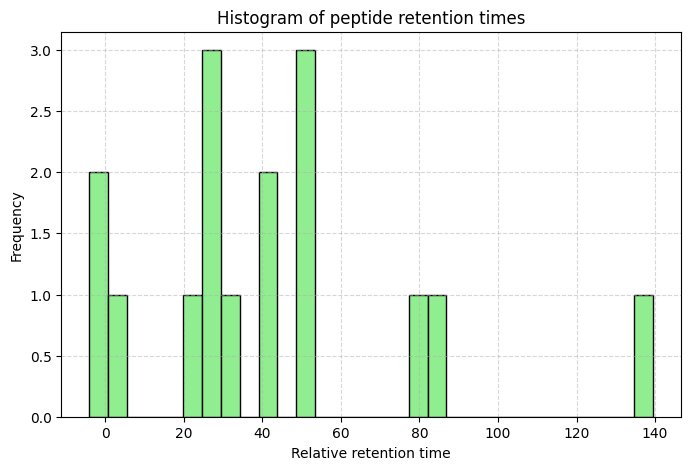

In [14]:
rt_plot = ps.plot_retention_time(peptides_rt)

In [15]:
rt_filtered = (peptides_rt)
print(rt_filtered)

{'MATSRYEPVAEIGVGAYGTVYK': 51.6, 'ARDPHSGHFVALK': 32.1, 'VTLVFEHVDQDLRTYLDK': 52.1, 'APPPGLPAETIK': 29.1, 'DLMRQFLRGLDFLHANCIVHRDLK': 85.9, 'PENILVTSGGTVK': 28.3, 'PLFCGNSEADQLGK': 28.2, 'RISAFRALQHSYLHK': 49.3, 'DEGNPE': -4.0, 'MEDEEK': -0.7, 'AEERHK': 2.5, 'AGRSEEAVRWGARARK': 23.9, 'MVIEWERPRMILSNTTAVTPFLTK': 82.0, 'LWQETVQQGGNMSGLARRSPRSGDGK': 39.2, 'LEALYVLMVLGFFGFFTLGIMLSYIRSK': 139.5, 'LEHSNDPFNVYIESNAWQEK': 42.6}


# Mass spectra

In [17]:
peptides_molmass = ps.calculate_mol_mass_collection(pooled_peptides, amino_acid_mass_dalton)
print(peptides_molmass)


{'MATSRYEPVAEIGVGAYGTVYK': 2344.6899999999996, 'ARDPHSGHFVALK': 1416.61, 'VTLVFEHVDQDLRTYLDK': 2173.4700000000003, 'APPPGLPAETIK': 1172.41, 'DLMRQFLRGLDFLHANCIVHRDLK': 2893.44, 'PENILVTSGGTVK': 1296.4899999999998, 'PLFCGNSEADQLGK': 1460.6400000000003, 'RISAFRALQHSYLHK': 1809.12, 'DEGNPE': 641.6, 'MEDEEK': 761.81, 'AEERHK': 750.8199999999999, 'AGRSEEAVRWGARARK': 1782.01, 'MVIEWERPRMILSNTTAVTPFLTK': 2816.4, 'LWQETVQQGGNMSGLARRSPRSGDGK': 2798.0900000000006, 'LEALYVLMVLGFFGFFTLGIMLSYIRSK': 3211.9799999999996, 'LEHSNDPFNVYIESNAWQEK': 2402.5699999999997}


In [18]:
peptides_mz = ps.calculate_mz_collection(peptides_molmass)
print(peptides_mz)

{'MATSRYEPVAEIGVGAYGTVYK': 1173.3519999999999, 'ARDPHSGHFVALK': 709.3119999999999, 'VTLVFEHVDQDLRTYLDK': 1087.7420000000002, 'APPPGLPAETIK': 587.212, 'DLMRQFLRGLDFLHANCIVHRDLK': 1447.727, 'PENILVTSGGTVK': 649.2519999999998, 'PLFCGNSEADQLGK': 731.3270000000001, 'RISAFRALQHSYLHK': 905.5669999999999, 'DEGNPE': 321.807, 'MEDEEK': 381.912, 'AEERHK': 376.417, 'AGRSEEAVRWGARARK': 892.012, 'MVIEWERPRMILSNTTAVTPFLTK': 1409.207, 'LWQETVQQGGNMSGLARRSPRSGDGK': 1400.0520000000004, 'LEALYVLMVLGFFGFFTLGIMLSYIRSK': 1606.9969999999998, 'LEHSNDPFNVYIESNAWQEK': 1202.292}


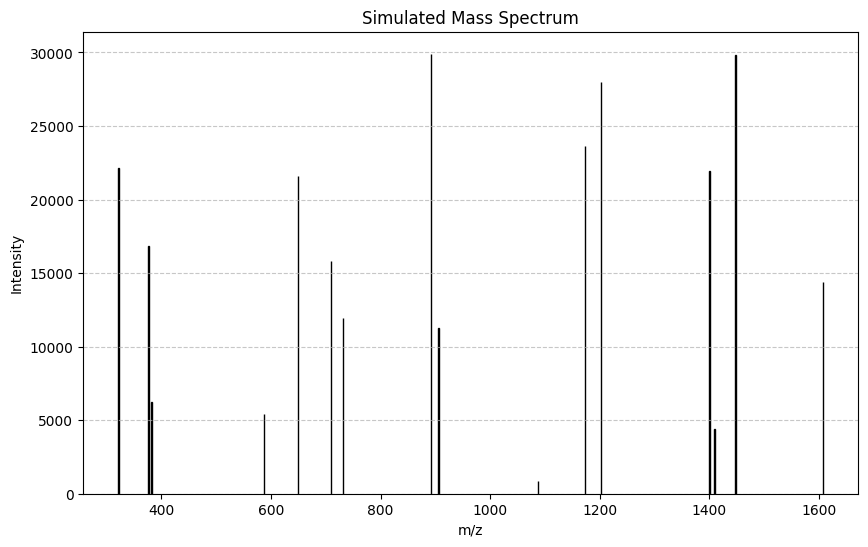

In [19]:
mz_spectrum = ps.plot_spectrum(peptides_mz.values())

In [20]:
# for peptide: 'MATSRYEPVAEIGVGAYGTVYK'
P11802_fragment_peptide = ps.fragment_peptide('MATSRYEPVAEIGVGAYGTVYK')
print(P11802_fragment_peptide)

['M', 'MA', 'MAT', 'MATS', 'MATSR', 'MATSRY', 'MATSRYE', 'MATSRYEP', 'MATSRYEPV', 'MATSRYEPVA', 'MATSRYEPVAE', 'MATSRYEPVAEI', 'MATSRYEPVAEIG', 'MATSRYEPVAEIGV', 'MATSRYEPVAEIGVG', 'MATSRYEPVAEIGVGA', 'MATSRYEPVAEIGVGAY', 'MATSRYEPVAEIGVGAYG', 'MATSRYEPVAEIGVGAYGT', 'MATSRYEPVAEIGVGAYGTV', 'MATSRYEPVAEIGVGAYGTVY', 'ATSRYEPVAEIGVGAYGTVYK', 'TSRYEPVAEIGVGAYGTVYK', 'SRYEPVAEIGVGAYGTVYK', 'RYEPVAEIGVGAYGTVYK', 'YEPVAEIGVGAYGTVYK', 'EPVAEIGVGAYGTVYK', 'PVAEIGVGAYGTVYK', 'VAEIGVGAYGTVYK', 'AEIGVGAYGTVYK', 'EIGVGAYGTVYK', 'IGVGAYGTVYK', 'GVGAYGTVYK', 'VGAYGTVYK', 'GAYGTVYK', 'AYGTVYK', 'YGTVYK', 'GTVYK', 'TVYK', 'VYK', 'YK', 'K']
